In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

resolution     = config.resolution
region         = config.region
data_path      = config.data_path
post_data_path = config.post_data_path
shp_path       = config.shp_path
fig_path       = config.fig_path

pd.set_option('display.max_columns', None)

In [13]:
roots = pd.read_csv(f'{data_path}csv/DTB_US.csv', encoding='latin-1')
# roots

roots = roots.sort_values(by=['lon']).reset_index(drop=True)
roots = roots.dropna()

barplot = pd.DataFrame()
barplot = roots[['lon','lat','number','Field','gNATSGO','SoilGrids250m','SoilGrids250m_rev','Pelletier']].copy()
barplot['Name'] = (barplot['number']).astype(str) # make name column string

# print(barplot)
barplot

,lon,lat,number,Field,gNATSGO,SoilGrids250m,SoilGrids250m_rev,Pelletier,Name
0,-123.643300,39.727300,1.0,45.0,90,1260,40.378757,100.00000,1.0
1,-123.200000,42.500000,12.0,55.0,75,934,24.008268,0.00000,12.0
2,-122.700000,43.500000,13.0,300.0,111,1173,40.643333,100.00000,13.0
3,-122.348000,39.153000,33.0,50.0,48,356,13.069410,100.00000,33.0
4,-117.677000,34.287000,8.0,81.0,0,1304,37.092320,100.00000,8.0
5,-117.677000,34.287000,3.0,81.0,0,1304,37.092320,100.00000,3.0
6,-117.173500,33.451700,2.0,62.0,101,743,19.083172,100.00000,2.0
7,-116.680000,33.810000,4.0,25.0,29,1637,50.862713,0.00000,4.0
8,-116.680000,33.810000,9.0,35.0,29,1637,50.862713,0.00000,9.0
9,-109.920000,38.110000,32.0,45.0,48,6160,237.045230,0.00000,32.0


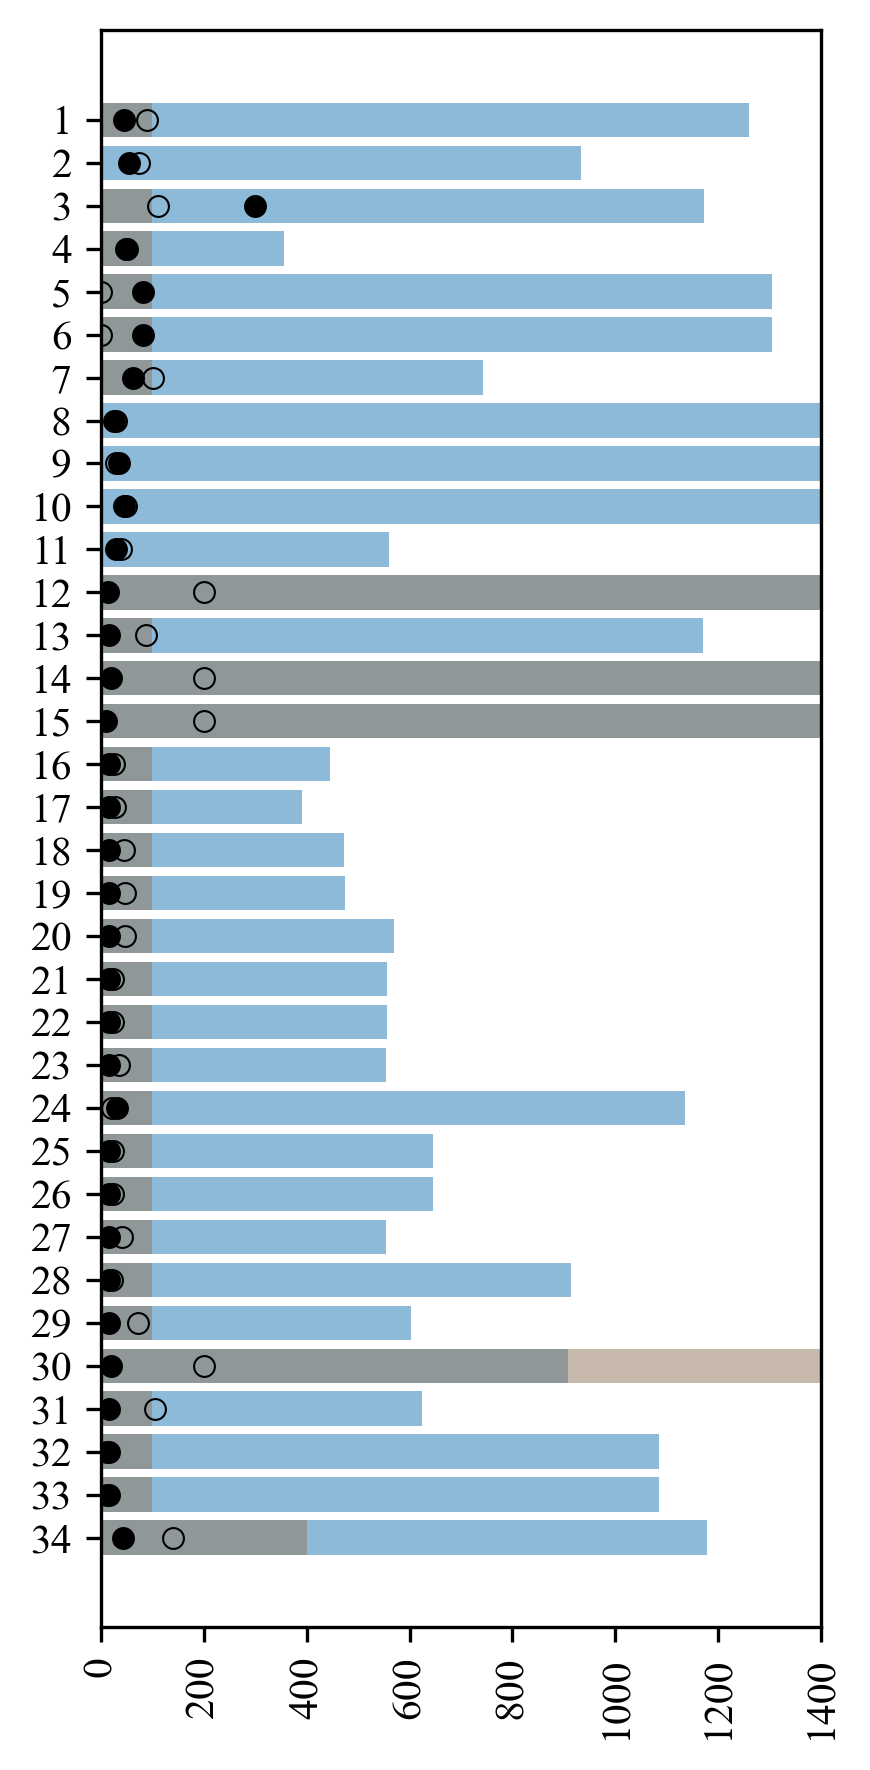

In [38]:
# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
# soillabels = list(np.arange(150, -50, step=-50))
dlabels = list(np.arange(0, 1600, step=200))
# labels = soillabels + dlabels
labels = dlabels

# Plot figure
plt.figure(figsize = (3, 6), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['SoilGrids250m'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Pelletier'], color = '#91755a',alpha=0.5)

plt.plot(barplot['Field'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['gNATSGO'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
plt.xticks(np.arange(0, 1600, step=200), labels = labels)
plt.yticks(np.arange(0, 34, 1), labels = np.arange(1, 35, 1))

# plt.xlim(-150, 2000)
plt.xlim(0, 1400)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tight_layout()

## Uncomment for downloading fig
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/h1_fDTB.pdf", transparent=True)
plt.show()

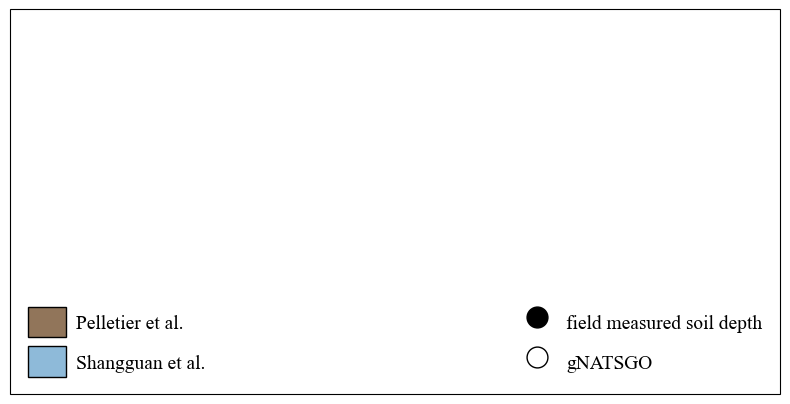

In [39]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
legend_elements1 = [
    Patch(facecolor='#91755a', edgecolor='black', label='Pelletier et al.'),
    Patch(facecolor='#8ebad9', edgecolor='black', label='Shangguan et al.')
]

legend_elements2 = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', markerfacecolor='black',
        markersize=15, label='field measured soil depth'),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', markerfacecolor='none', 
        markersize=15, label='gNATSGO')
]

leg1 = ax.legend(
    handles=legend_elements1,
    loc='lower left',
    frameon=False,
    title='',
    fontsize=14,
    handlelength=2, 
    handleheight=2,
    handletextpad=0.5,  
    labelspacing= 0.5
)

# 手动将第一个图例添加到坐标轴
ax.add_artist(leg1)

# 再添加第二个图例
ax.legend(
    handles=legend_elements2,
    loc='lower right',
    frameon=False,
    title='',
    fontsize=14,
    handlelength=2, 
    handleheight=2,
    handletextpad=0.5,  
    labelspacing= 0.5
)

# 设置图形标题和布局
# plt.title('Global Woody Vegetation Cover with Bedrock Depth', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [11]:
## Extract Columns for Barplot (NOTE: Must exclude first header row manually)
roots = pd.read_csv(f'/tera11/zhwei/students/Xionghui/data/run/0p1/csv/site.csv', encoding='latin-1')
print(roots)
roots = roots[roots['Sbedrock_field_min'] > 0]
roots = roots.sort_values(by=['lon']).reset_index(drop=True)
barplot = pd.DataFrame()
barplot = roots.copy()
print(barplot)
barplot

    Unnamed: 0        lat         lon Measure  Sbedrock_field_min  \
0            0 -34.300000   19.150000       N                 NaN   
1            1 -32.338300  116.090400       N                 NaN   
2            2 -30.412800   18.249700       N                 NaN   
3            3  11.730000   76.450000       Y                 NaN   
4            4  20.815556  -89.245000       Y                 NaN   
..         ...        ...         ...     ...                 ...   
72          72  46.000000    4.500000       N                 NaN   
73          73  48.666111   14.707778       N                 NaN   
74          74  48.978611   13.811944       N                 NaN   
75          75  49.359722   18.383333       N                 NaN   
76          76  55.500000 -132.700000       N                 NaN   

    Sbedrock_field_max    Sbedrock       Ssoil  Soil_depth          DTB  \
0                  NaN  174.380510   64.498314        60.0    74.887535   
1                  Na

,Unnamed: 0,lat,lon,Measure,Sbedrock_field_min,Sbedrock_field_max,Sbedrock,Ssoil,Soil_depth,DTB,mask1,mask2,mask3,mask,num
0,56,39.7273,-123.6433,Y,140.0,420.0,290.320860,152.596080,45.0,124.930670,NaN,1.0,1.0,NaN,56
1,53,39.5745,-123.4770,Y,37.0,173.0,320.583160,99.357370,NaN,100.000000,1.0,1.0,1.0,1.0,53
2,51,39.1530,-122.3480,Y,80.0,300.0,233.371480,79.880260,50.0,100.000000,1.0,0.0,1.0,NaN,51
3,44,37.0879,-119.2505,Y,44.0,270.0,384.194270,82.869640,NaN,100.000000,1.0,1.0,1.0,1.0,44
4,41,35.9570,-118.6300,Y,135.0,380.0,434.338070,63.236490,75.0,74.929820,1.0,1.0,NaN,NaN,41
5,32,33.4517,-117.1735,Y,120.0,120.0,220.457100,40.271910,62.0,50.078670,1.0,1.0,NaN,NaN,32
6,36,33.8100,-116.6800,Y,394.0,406.0,109.356170,19.182775,35.0,24.929976,1.0,0.0,1.0,NaN,36
7,58,40.0280,-105.4880,Y,19.0,64.0,15.482319,81.912735,30.0,100.000000,1.0,0.0,1.0,NaN,58
8,12,29.8500,-98.4900,Y,999.0,999.0,308.051000,104.886410,32.0,124.976830,NaN,1.0,1.0,NaN,12
9,14,29.9400,-98.1200,Y,999.0,999.0,144.505280,82.507030,NaN,100.000000,1.0,1.0,1.0,1.0,14


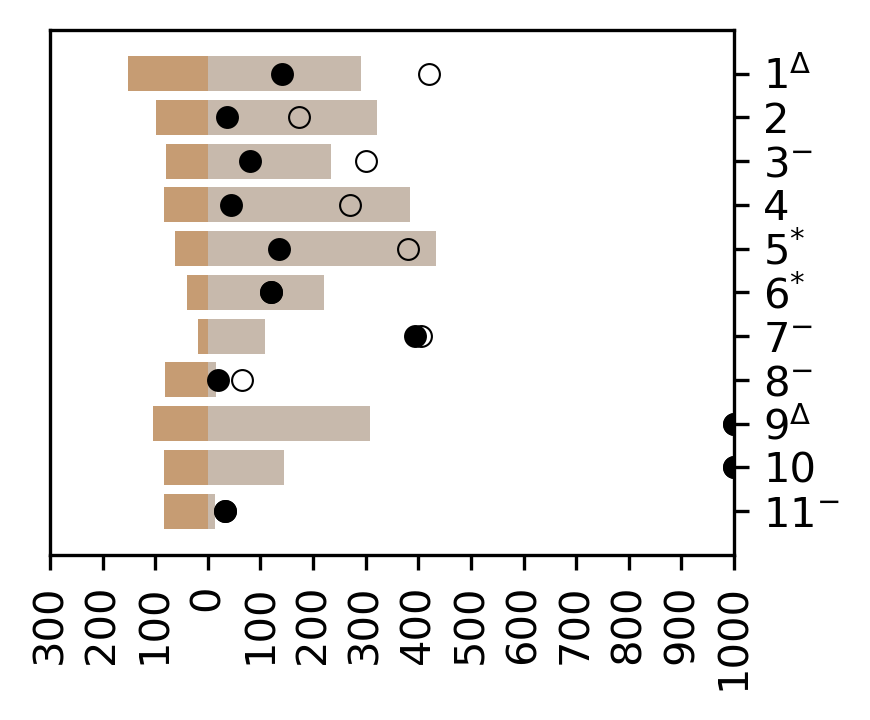

In [12]:

#barplot = barplot.dropna()
barplot['Ssoil'] = barplot['Ssoil'] * -1
barplot['Name'] = np.arange(1,12,1)

# barplot = barplot[0:20]
# barplot = barplot.sort_values(by = 'Number_For_Plotting')
# print(barplot)

# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
soillabels = list(np.arange(300, -100, step=-100))
dlabels = list(np.arange(100, 1100, step=100))
labels = soillabels + dlabels

# Plot figure
plt.figure(figsize = (3, 2.5), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Ssoil'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Ssoil'], alpha=0.5, ecolor='red', capsize=3)

plt.barh(barplot['Name'],barplot['Sbedrock'], color = '#91755a',alpha=0.5)

plt.plot(barplot['Sbedrock_field_min'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['Sbedrock_field_max'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
# plt.xticks(np.arange(0, 1600, step=200), labels = labels)
yticks = ['$1^{{Δ}}$','2','$3^{{-}}$','4','$5^{{*}}$','$6^{{*}}$','$7^{{-}}$','$8^{{-}}$','$9^{{Δ}}$','10','$11^{{-}}$']
plt.ylim(0, 12)
plt.yticks(np.arange(1, 12, 1), labels = yticks)
plt.xticks(np.arange(-300, 1100, step=100), labels = labels)
plt.xlim(-300, 1000)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# ax.spines['left'].set_color('none')

## Uncomment for downloading fig
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/h1_fSb.pdf", transparent=True)